In [1]:
# Libraries

#---Pandas
import pandas as pd
from pandas.tools.plotting import scatter_matrix

#---numpy
import numpy as np

#---matplotlib
from matplotlib import pyplot as plt

#---machine learning
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("data/irisdata", names = ['sepal_length','sepal_width',\
                                             'petal_length','petal_width','class'])
print "--------Peek at the data--------"
print data.head(10)
print "\n---------Length of data---------"
print data.shape
print "\n------Description of data-------"
print data.describe()
print "\n-----Groups of Flower Class-----"
print data.groupby('class').size()

--------Peek at the data--------
   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa

---------Length of data---------
(150, 5)

------Description of data-------
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       

--------------Sepal Length--------------


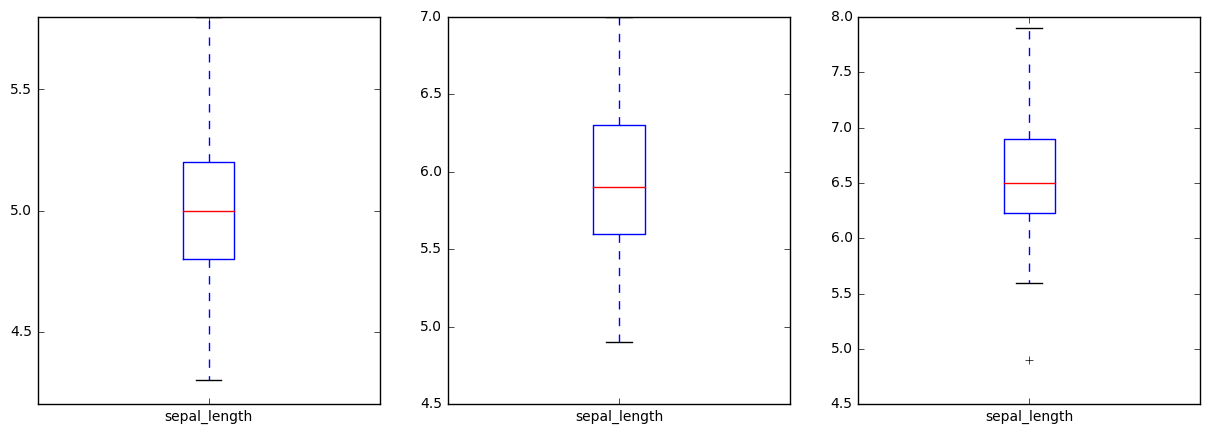

--------------Sepal Width--------------


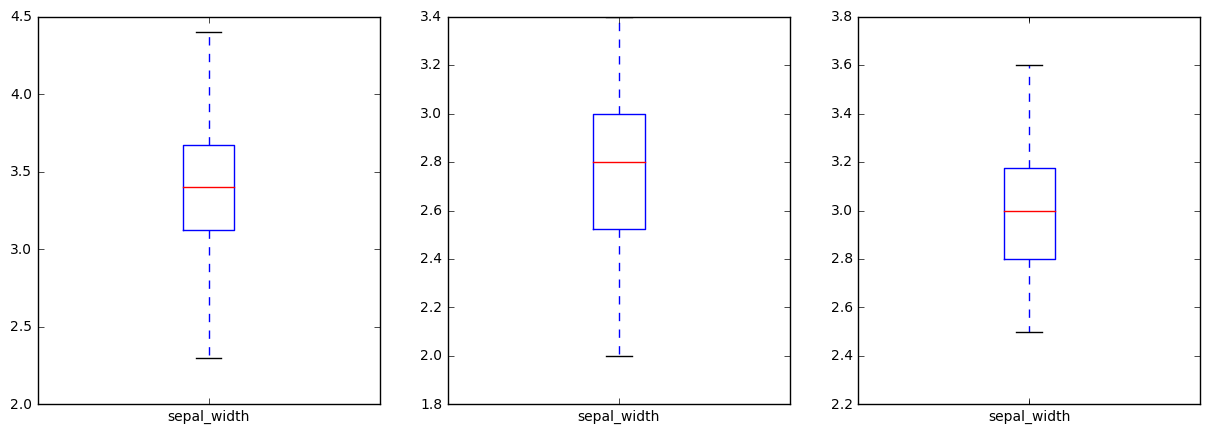

--------------Petal Length--------------


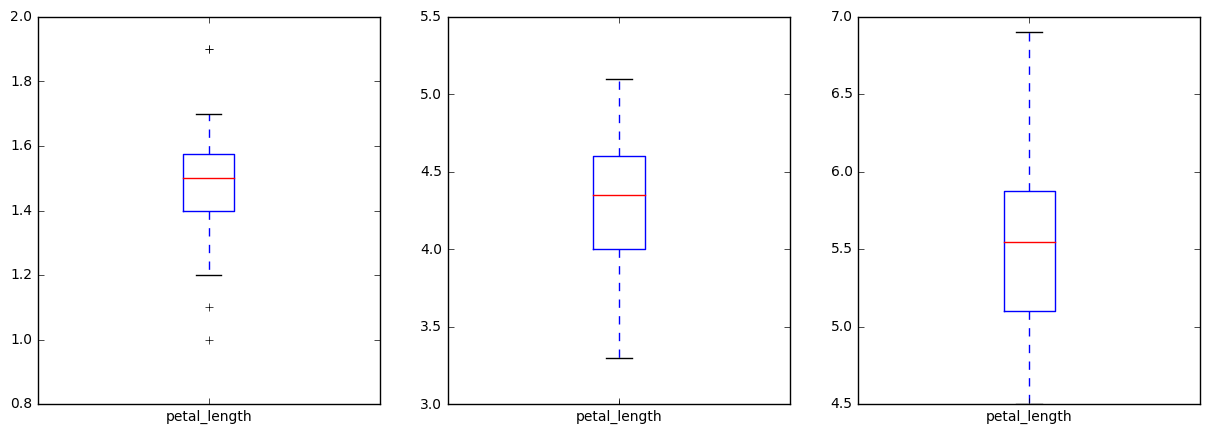

--------------Petal Width--------------


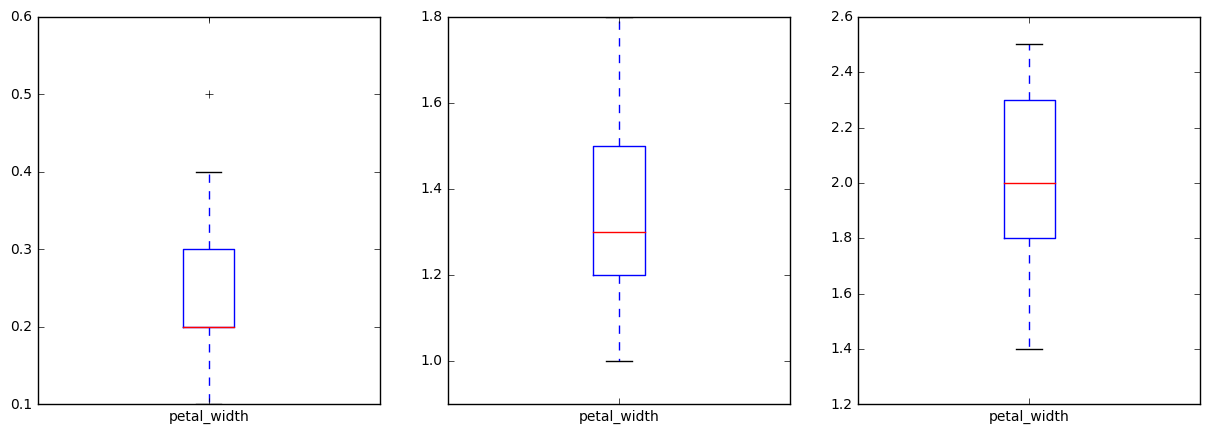

In [3]:
"""

This is the boxplots to see the differences between the classes of Iris.
The four categories of our data are filled so there is no data munging.

"""

print "--------------Sepal Length--------------"
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize = (15,5))
data.loc[data['class'] == 'Iris-setosa']['sepal_length']\
        .plot(kind = 'box', ax = axis1)
data.loc[data['class'] == 'Iris-versicolor']['sepal_length']\
        .plot(kind = 'box', ax = axis2)
data.loc[data['class'] == 'Iris-virginica']['sepal_length']\
        .plot(kind = 'box', ax = axis3)
    
plt.show()

print "--------------Sepal Width--------------"
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize = (15,5))
data.loc[data['class'] == 'Iris-setosa']['sepal_width']\
        .plot(kind = 'box', ax = axis1)
data.loc[data['class'] == 'Iris-versicolor']['sepal_width']\
        .plot(kind = 'box', ax = axis2)
data.loc[data['class'] == 'Iris-virginica']['sepal_width']\
        .plot(kind = 'box', ax = axis3)
    
plt.show()

print "--------------Petal Length--------------"
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize = (15,5))
data.loc[data['class'] == 'Iris-setosa']['petal_length']\
        .plot(kind = 'box', ax = axis1)
data.loc[data['class'] == 'Iris-versicolor']['petal_length']\
        .plot(kind = 'box', ax = axis2)
data.loc[data['class'] == 'Iris-virginica']['petal_length']\
        .plot(kind = 'box', ax = axis3)
    
plt.show()

print "--------------Petal Width--------------"
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize = (15,5))
data.loc[data['class'] == 'Iris-setosa']['petal_width']\
        .plot(kind = 'box', ax = axis1)
data.loc[data['class'] == 'Iris-versicolor']['petal_width']\
        .plot(kind = 'box', ax = axis2)
data.loc[data['class'] == 'Iris-virginica']['petal_width']\
        .plot(kind = 'box', ax = axis3)
    
plt.show()

In [22]:
"""










Looking at Histograms to see which feature distinguishes the flowers the most.
This also tells us which features have overlapping.










"""
print

--------------Sepal Length--------------


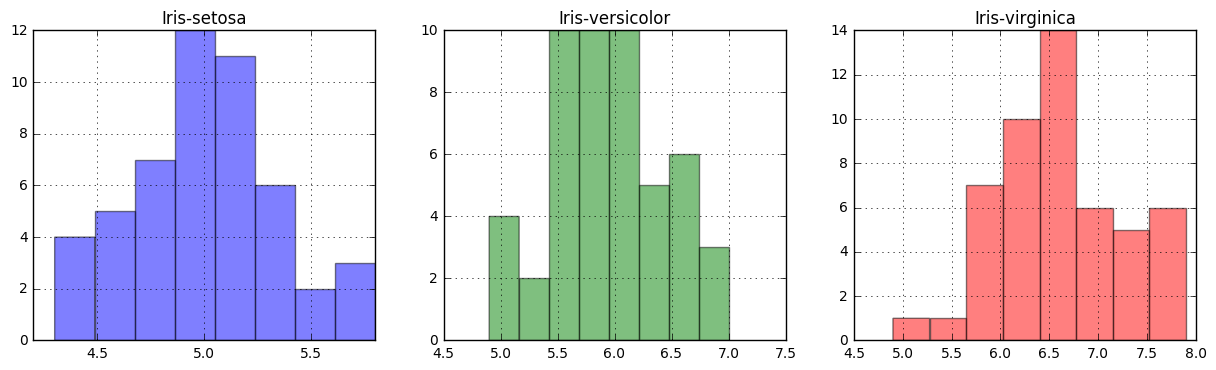

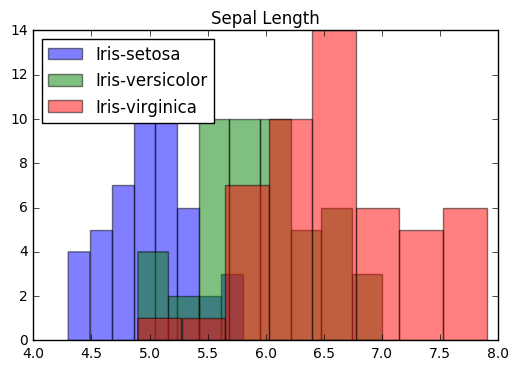

In [5]:
"""

This is the histograms to see the sepal length between the classes of Iris.
Our data are filled so there is no data munging.

"""
print "--------------Sepal Length--------------"
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,4))
ax1.set_title("Iris-setosa")
ax2.set_title("Iris-versicolor")
ax3.set_title("Iris-virginica")

data.loc[data['class']=='Iris-setosa']['sepal_length']\
.hist(bins = 8, alpha=0.5, label='Iris-setosa',ax = ax1,color = 'blue')

data.loc[data['class'] == 'Iris-versicolor']['sepal_length']\
.hist(bins = 8, alpha=0.5, label='Iris-versicolor',ax = ax2,color = 'green')

data.loc[data['class'] == 'Iris-virginica']['sepal_length']\
.hist(bins = 8, alpha=0.5, label='Iris-virginica',ax = ax3, color = 'red')
plt.show()

fig
plt.hist(data.loc[data['class']=='Iris-setosa']['sepal_length'], \
                  bins = 8, alpha=0.5, label='Iris-setosa')

plt.hist(data.loc[data['class'] == 'Iris-versicolor']['sepal_length'], \
                 bins = 8, alpha=0.5, label='Iris-versicolor')

plt.hist(data.loc[data['class'] == 'Iris-virginica']['sepal_length'], \
                 bins = 8, alpha=0.5, label='Iris-virginica')

plt.legend(loc='upper left')
plt.title("Sepal Length")
plt.show()

"""
Sepal Length Conclusion:
There seems to be a good distinction from setosa and the other two.
Versicolor seeping into both of them and most of virginica.

Category still effective in determining which Iris.
"""
print

--------------Sepal Width--------------


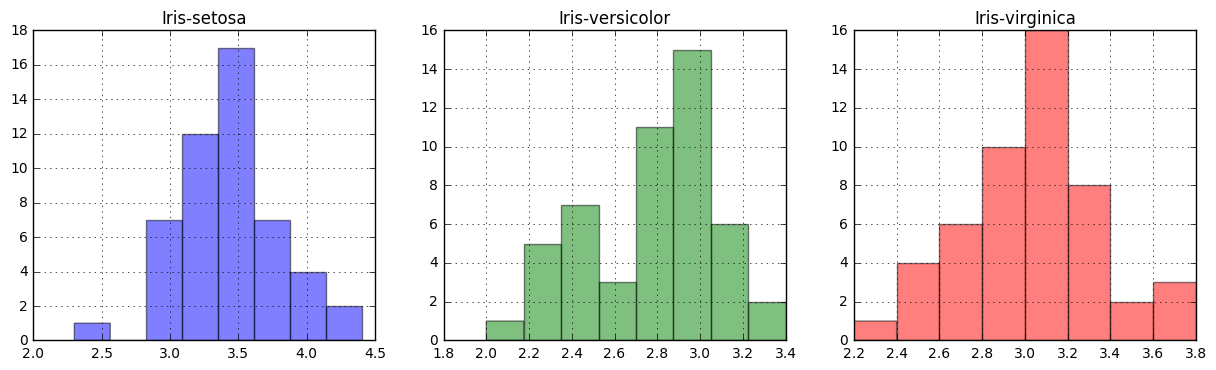

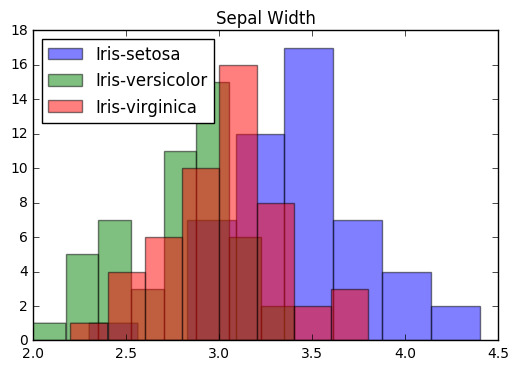

In [6]:
"""

This is the histograms to see the sepal width between the classes of Iris.
Our data are filled so there is no data munging.

"""
print "--------------Sepal Width--------------"
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,4))

ax1.set_title("Iris-setosa")
ax2.set_title("Iris-versicolor")
ax3.set_title("Iris-virginica")

data.loc[data['class']=='Iris-setosa']['sepal_width']\
.hist(bins = 8, alpha=0.5, label='Iris-setosa',ax = ax1,color = 'blue')
data.loc[data['class'] == 'Iris-versicolor']['sepal_width']\
.hist(bins = 8, alpha=0.5, label='Iris-versicolor',ax = ax2,color = 'green')
data.loc[data['class'] == 'Iris-virginica']['sepal_width']\
.hist(bins = 8, alpha=0.5, label='Iris-virginica',ax = ax3, color = 'red')
plt.show()

# plot together
fig
plt.hist(data.loc[data['class']=='Iris-setosa']['sepal_width'], \
                  bins = 8, alpha=0.5, label='Iris-setosa')
plt.hist(data.loc[data['class'] == 'Iris-versicolor']['sepal_width'], \
                 bins = 8, alpha=0.5, label='Iris-versicolor')
plt.hist(data.loc[data['class'] == 'Iris-virginica']['sepal_width'], \
                 bins = 8, alpha=0.5, label='Iris-virginica')

plt.legend(loc='upper left')
plt.title("Sepal Width")
plt.show()

"""
Sepal Width Conclusion:
There seems to be a good distinction between setosa and versicolor.
Virginica being in the middle means it will be harder to distinguish from the other 2.

Category not as effective as sepal length.
"""
print

--------------Petal Length--------------


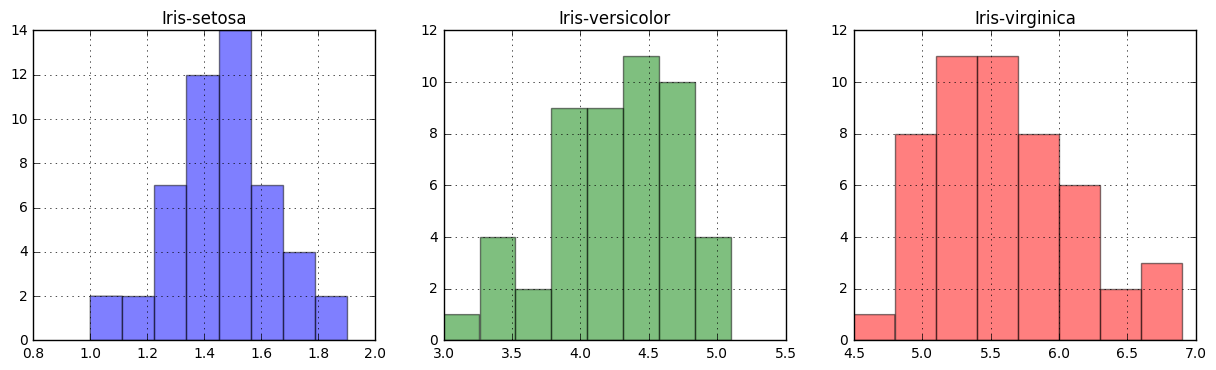

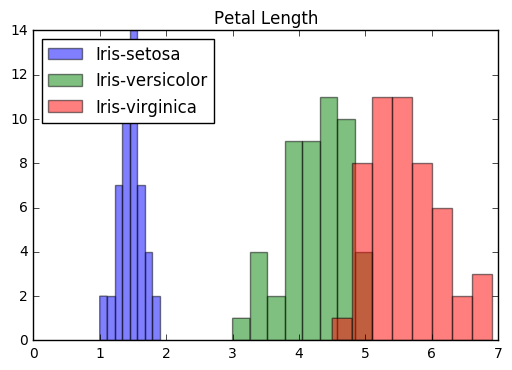

In [7]:
"""

This is the histograms to see the petal length between the classes of Iris.
Our data are filled so there is no data munging.

"""
print "--------------Petal Length--------------"
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,4))

ax1.set_title("Iris-setosa")
ax2.set_title("Iris-versicolor")
ax3.set_title("Iris-virginica")

data.loc[data['class']=='Iris-setosa']['petal_length']\
.hist(bins = 8, alpha=0.5, label='Iris-setosa',ax = ax1,color = 'blue')
data.loc[data['class'] == 'Iris-versicolor']['petal_length']\
.hist(bins = 8, alpha=0.5, label='Iris-versicolor',ax = ax2,color = 'green')
data.loc[data['class'] == 'Iris-virginica']['petal_length']\
.hist(bins = 8, alpha=0.5, label='Iris-virginica',ax = ax3, color = 'red')
plt.show()

# plot together
fig
plt.hist(data.loc[data['class']=='Iris-setosa']['petal_length'], \
                  bins = 8, alpha=0.5, label='Iris-setosa')
plt.hist(data.loc[data['class'] == 'Iris-versicolor']['petal_length'], \
                 bins = 8, alpha=0.5, label='Iris-versicolor')
plt.hist(data.loc[data['class'] == 'Iris-virginica']['petal_length'], \
                 bins = 8, alpha=0.5, label='Iris-virginica')

plt.legend(loc='upper left')
plt.title("Petal Length")
plt.show()

"""
Petal Length Conclusion:
All three are well distinguished from each other.

This category seems to be the biggest determining factor so far.
"""
print

--------------Petal Width--------------


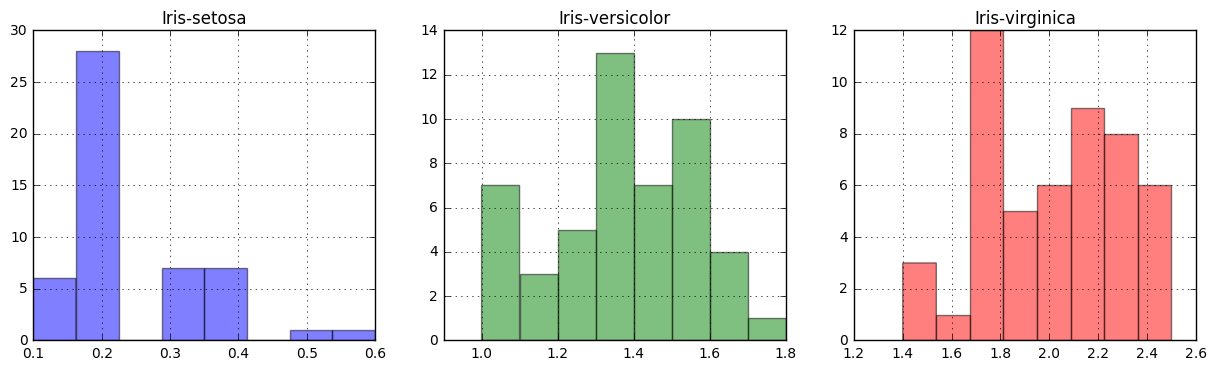

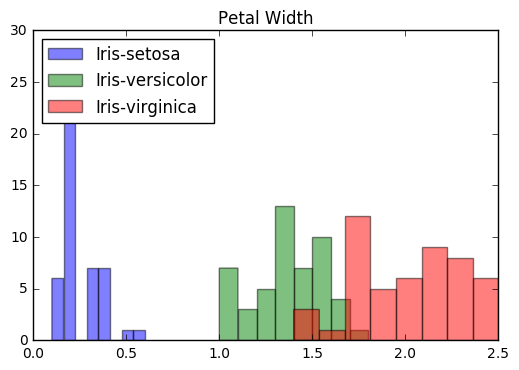

In [8]:
"""

This is the histograms to see the petal width between the classes of Iris.
Our data are filled so there is no data munging.

"""
print "--------------Petal Width--------------"
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize = (15,4))

ax1.set_title("Iris-setosa")
ax2.set_title("Iris-versicolor")
ax3.set_title("Iris-virginica")

data.loc[data['class']=='Iris-setosa']['petal_width']\
.hist(bins = 8, alpha=0.5, label='Iris-setosa',ax = ax1,color = 'blue')
data.loc[data['class'] == 'Iris-versicolor']['petal_width']\
.hist(bins = 8, alpha=0.5, label='Iris-versicolor',ax = ax2,color = 'green')
data.loc[data['class'] == 'Iris-virginica']['petal_width']\
.hist(bins = 8, alpha=0.5, label='Iris-virginica',ax = ax3, color = 'red')
plt.show()

# plot together
fig
plt.hist(data.loc[data['class']=='Iris-setosa']['petal_width'], \
                  bins = 8, alpha=0.5, label='Iris-setosa')
plt.hist(data.loc[data['class'] == 'Iris-versicolor']['petal_width'], \
                 bins = 8, alpha=0.5, label='Iris-versicolor')
plt.hist(data.loc[data['class'] == 'Iris-virginica']['petal_width'], \
                 bins = 8, alpha=0.5, label='Iris-virginica')

plt.legend(loc='upper left')
plt.title("Petal Width")
plt.show()

"""
Petal Width Conclusion:
Similar to petal length; the three classes are clearly distinguished from each other.

The category is not as good as petal length in determining,
but is the second biggest factor we should consider.

"""
print

In [23]:
"""











Looking at the interactions between features for the 3 classes for perhaps feature engineering.










"""
print

---Iris-setosa


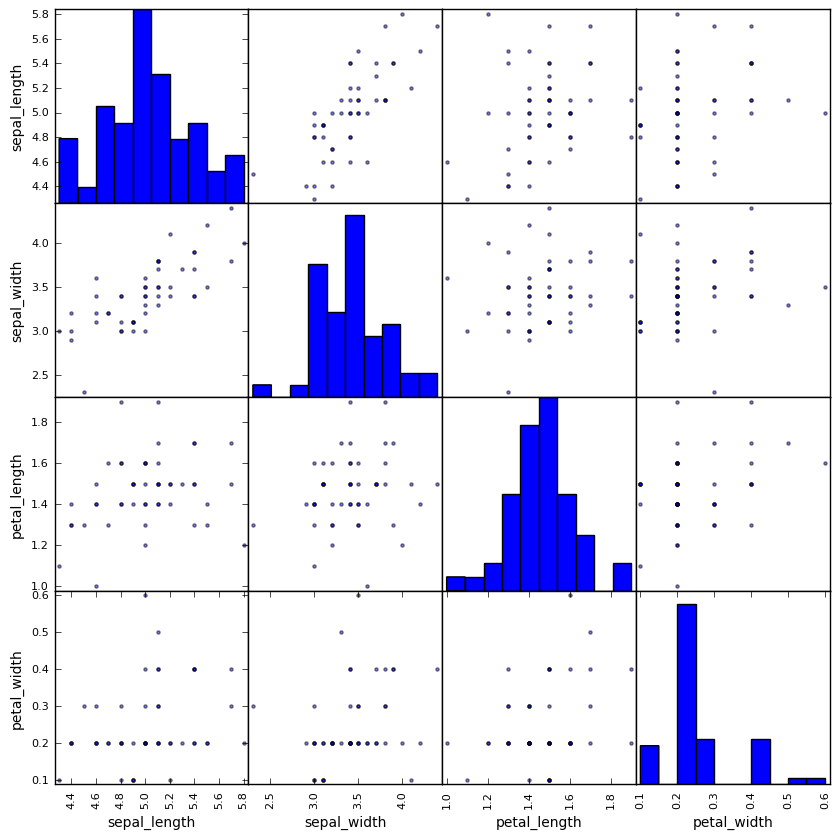

In [10]:
print "---Iris-setosa"
scatter_matrix(data.loc[data['class']=='Iris-setosa'], figsize = (10,10))
plt.show()

"""
Conclusion:

We can see clear positive correlation between:
1. petal length and [sepal width]
2. petal width  and []
3. sepal width  and [sepal length]
4. sepal length and [sepal width]



"""
print

---Iris-versicolor


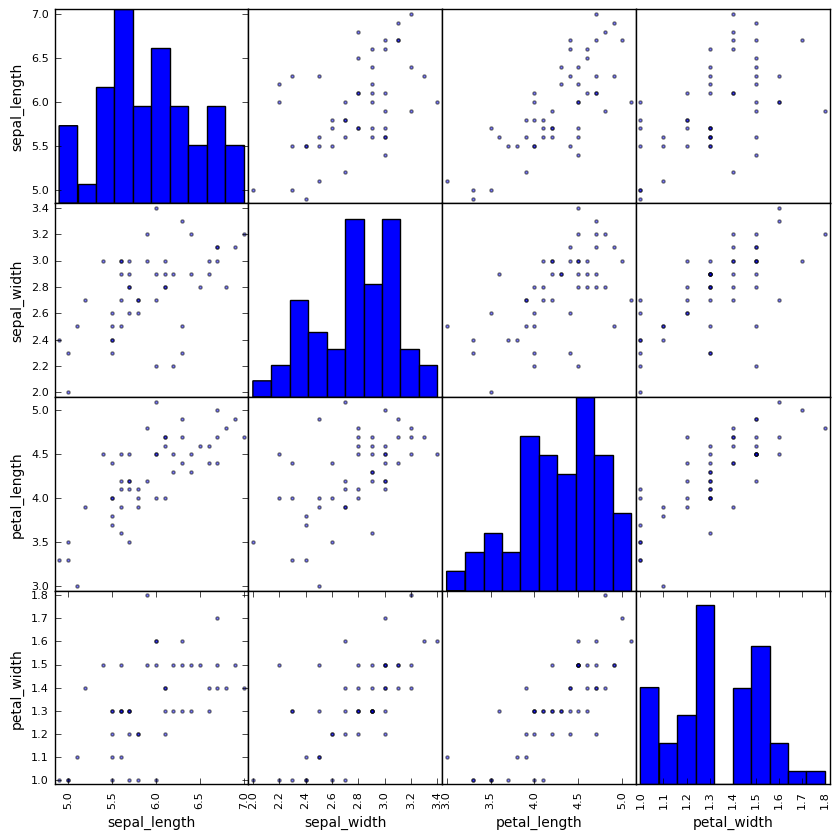

In [11]:
print "---Iris-versicolor"
scatter_matrix(data.loc[data['class']=='Iris-versicolor'], figsize = (10,10))
plt.show()


"""
Conclusion:

We can see clear positive correlation between:
1. petal length and [petal width, sepal length, sepal width]
2. petal width  and [petal length, sepal width]
3. sepal width  and [petal length, petal width]
4. sepal length and [petal length]



"""
print

---Iris-virginica


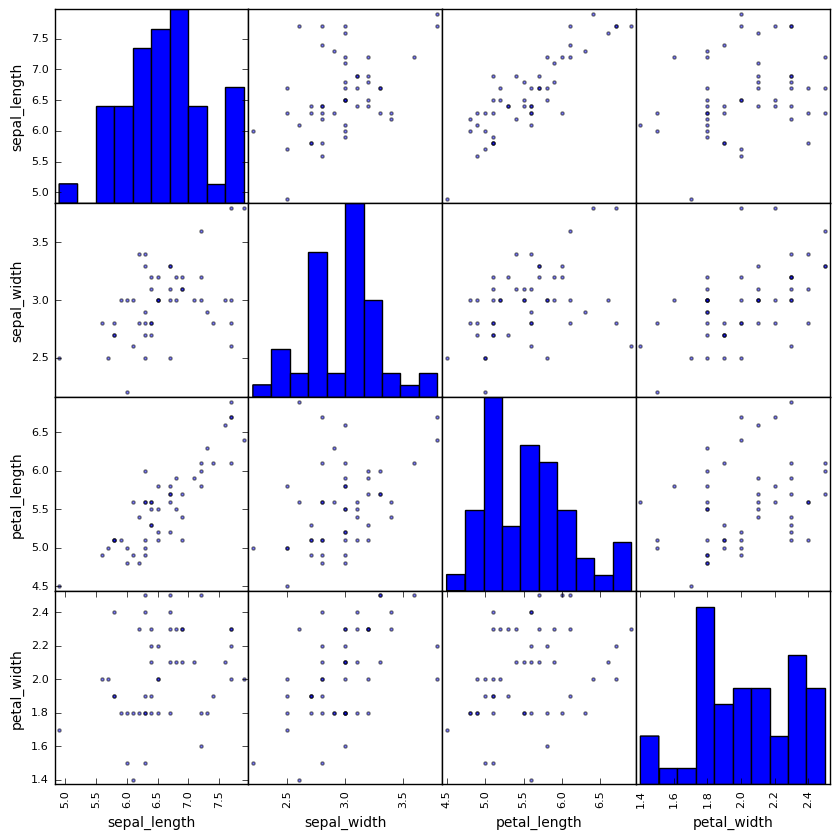

In [12]:
print "---Iris-virginica"
scatter_matrix(data.loc[data['class']=='Iris-virginica'], figsize = (10,10))
plt.show()

"""
Conclusion:

We can see clear positive correlation between:
1. petal length and [sepal length]
2. petal width  and []
3. sepal width  and []
4. sepal length and [petal length]



"""
print

In [24]:
"""











Creating training data and test data










"""
print

In [14]:
array = data.values

#takes out the classes
X = array[:,0:4]

#the classes
Y = array[:,4]

#making 20 percent our test data
test_size = .2
seed = 7

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y,test_size = test_size, \
                                                                     random_state = seed)

In [15]:
# 10 fold cross validation for accuracy
n_folds = 10
n_instances = len(X_train)
scoring = 'accuracy'

In [16]:
"""

Building models: We will use several classification to figure out which is best accurate.


"""
print

In [17]:
models = []

#append tuples so we can distinguish by name later
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [18]:
results = []
names = []

for name, model in models:
    kfold = cross_validation.KFold(n = n_instances, n_folds = n_folds, random_state = seed)
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    model_accuracy = "%s: %f +- %f" % (name,cv_results.mean(),cv_results.std())
    print model_accuracy

LR: 0.966667 +- 0.040825
KNN: 0.983333 +- 0.033333
CART: 0.975000 +- 0.038188
NB: 0.975000 +- 0.053359


In [25]:
"""

Making Predictions: Now that we know KNN is best accurate, we should use our test data to see how well it does.

"""
print

In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train,Y_train)
predictions = knn.predict(X_test)

print "Accuracy: ", accuracy_score(Y_test, predictions)
print "\n--------------------------------------------------------"
print "Confusion Matrix"
print confusion_matrix(Y_test, predictions)
print "\n--------------------------------------------------------"
print "Classification Report"
print classification_report(Y_test, predictions, digits = 4)

"""
Looks like the model knew whether or not the Iris class was setosa 100% of the time.
This is easily explainable when we remember the histograms of the petal length and width.

Versicolor and Virginica had overlap in all the histograms and therefore would have less accuracy.

The F1 score tells us that the accuracy of the test was 89.96% accurate, which is pretty good.

"""
print

Accuracy:  0.9

--------------------------------------------------------
Confusion Matrix
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]

--------------------------------------------------------
Classification Report
             precision    recall  f1-score   support

Iris-setosa     1.0000    1.0000    1.0000         7
Iris-versicolor     0.8462    0.9167    0.8800        12
Iris-virginica     0.9000    0.8182    0.8571        11

avg / total     0.9018    0.9000    0.8996        30




In [26]:
"""
If we weren't satisfied with our results...
we can feature engineer according to the correlations shown in matrix scatter for a better model.

"""
print